[](http://)

<h1> HANDWRITTEN SIGNATURE VERIFICATION USING CONVOLUTION NEURAL NETWORK (CNN) </h1>

<h2> Part 2 </h2>

_This is Yash Gupta, India Institute of Information Technology, Nagpur representing final year project. Stay and upvote if you like the notebook._

<h2> Outline </h2>

- Introduction
- Literature Survey
- The Proposed Methodology
- Industrial Application
- Conclusion
- References

<h1> CLASSIFICATION </h1>

Models selected for feature extraction are used with supervised learning algorithms to classify:-

1. Logistic Regression
2. Random Forest
3. Linear SVM
4. RBF SVM
5. Sigmoid SVM
6. Poly SVM

In [1]:

import numpy as np
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from scipy.spatial import distance
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
def dataExt(model, optimizer):
    # Load feature ext Data
    filesTrain = "../input/feature-extracted/imgNames/train_data_names.pkl"
    filesTest = "../input/feature-extracted/imgNames/test_data_names.pkl"
    #../input/feature-extracted/InceptionV3_features/InceptionV3_Adagrad_test.npy
    pathTrain = "../input/feature-extracted/" + model + "_features/" + model + "_" + optimizer + "_train.npy"
    pathTest = "../input/feature-extracted/" + model + "_features/" + model + "_" + optimizer + "_test.npy"
    
    # unload pickle the file names
    with open(filesTrain,'rb') as f:
        file_train_list = np.load(f, allow_pickle=True)
        
    with open(filesTest,'rb') as f:
        file_test_list = np.load(f, allow_pickle=True)
    # data preprocessing 
    file_train_list = [i[18:] for i in file_train_list]
    file_test_list = [i[17:] for i in file_test_list]
    
    feat_train_np = np.load(pathTrain)
    feat_test_np = np.load(pathTest)
    # return all the data of features of specific model
    return file_train_list, file_test_list, feat_train_np, feat_test_np

<h1> Logistic Regression </h1>

In [3]:
def LogReg(model, optimizer, X_train, y_train, X_test, y_test):
    print("Logistic Regression", model, optimizer)    
    # extract data using function made above
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
    #data preprocessing
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    #actual model of logistic regression from sklearn library
    Model = LogisticRegression()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    # check the accuracy p, r,f
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Random Forest </h1>

In [4]:
def RandFor(model, optimizer, X_train, y_train, X_test, y_test):
    print("Logistic Regression", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = RandomForestClassifier()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Linear SVM </h1>

In [5]:

def LinearSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("Linear SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='linear') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Rbf SVM </h1>

In [6]:
def RbfSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("RBF SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='rbf') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Sigmoid SVM </h1>

In [7]:
def SigmoidSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("Sigmoid SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='sigmoid') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Poly SVM </h1>

In [8]:
def PolySVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("POLY SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='poly') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Classification Results </h1>

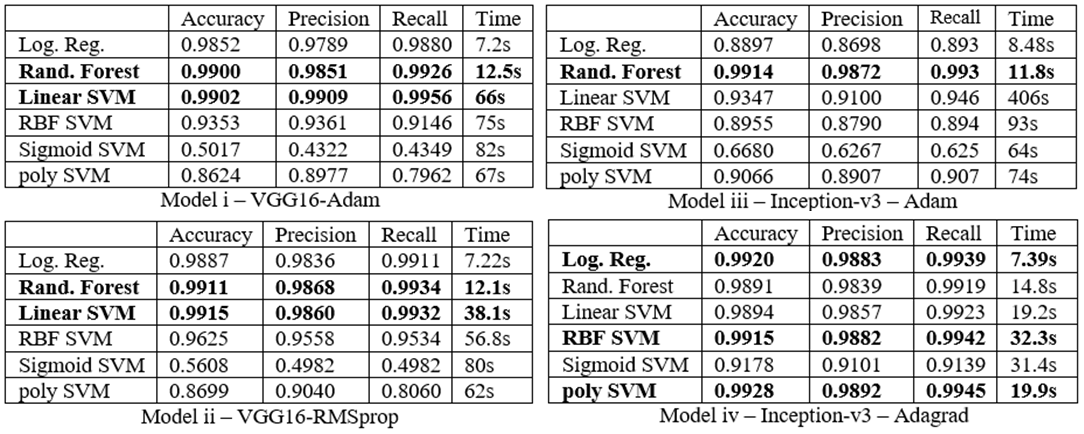

<h1> Logistic Regression Test </h1>

In [9]:
try:
    %%time
    data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
    X_data = data[['img1','img2']]
    y_data = data[['target']]
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
    LogReg('VGG16', 'Adam', X_train, y_train, X_test, y_test)
except:
    pass

In [10]:
try:
    %%time
    data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
    X_data = data[['img1','img2']]
    y_data = data[['target']]
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
    LogReg('VGG16','RMSprop', X_train, y_train, X_test, y_test)
except:
    pass

In [11]:
try:
    %%time
    data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
    X_data = data[['img1','img2']]
    y_data = data[['target']]
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
    LogReg('InceptionV3','Adam', X_train, y_train, X_test, y_test)
except:
    pass

In [12]:
try:
    %%time
    data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
    X_data = data[['img1','img2']]
    y_data = data[['target']]
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
    LogReg('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)
except:
    pass

<h1> Random Forest </h1>

Logistic Regression VGG16 Adam
Acuracy 0.9916820702402958
P,R,F1: (0.9878190255220418, 0.9937636111661057, 0.9906966471395732, None)
CPU times: user 12.4 s, sys: 570 ms, total: 13 s
Wall time: 12.8 s


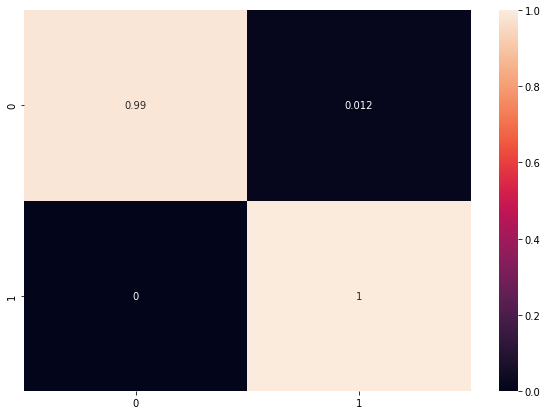

In [13]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('VGG16','Adam', X_train, y_train, X_test, y_test)

Logistic Regression VGG16 RMSprop
Acuracy 0.990493794560338
P,R,F1: (0.9858100118249902, 0.9929536112742219, 0.9892546825149302, None)
CPU times: user 12.2 s, sys: 425 ms, total: 12.6 s
Wall time: 12.4 s


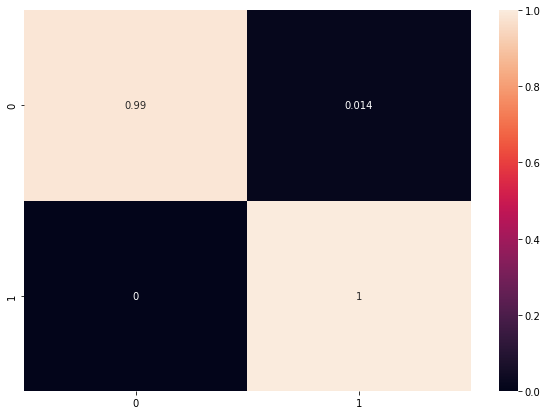

In [14]:

%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('VGG16','RMSprop', X_train, y_train, X_test, y_test)

Logistic Regression InceptionV3 Adam
Acuracy 0.9902297332981251
P,R,F1: (0.9856087125632049, 0.992712231632854, 0.9890286547399807, None)
CPU times: user 9.53 s, sys: 437 ms, total: 9.97 s
Wall time: 9.74 s


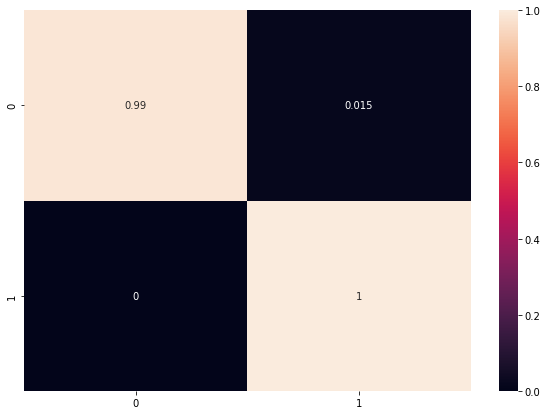

In [15]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('InceptionV3','Adam', X_train, y_train, X_test, y_test)

Logistic Regression InceptionV3 Adagrad
Acuracy 0.9918141008714022
P,R,F1: (0.9881316998468607, 0.9938296178343948, 0.9908902296613167, None)
CPU times: user 14 s, sys: 428 ms, total: 14.5 s
Wall time: 14.2 s


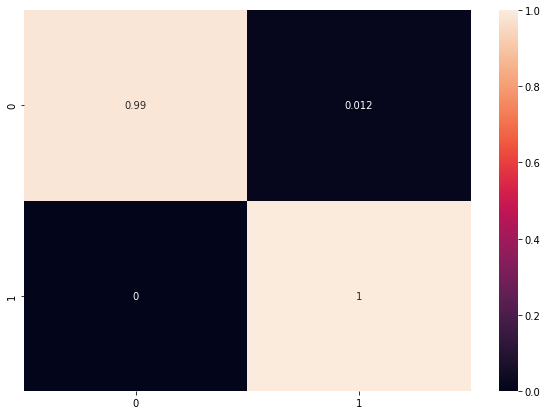

In [16]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Linear SVM Test </h1>

Linear SVM VGG16 Adam
Acuracy 0.9924742540269342
P,R,F1: (0.9887839433293979, 0.9944007858546169, 0.9915129872714861, None)
CPU times: user 1min 19s, sys: 554 ms, total: 1min 19s
Wall time: 1min 19s


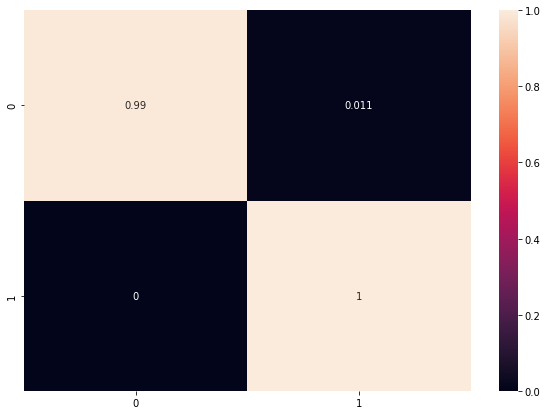

In [17]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('VGG16','Adam', X_train, y_train, X_test, y_test)

Linear SVM VGG16 RMSprop
Acuracy 0.991418008978083
P,R,F1: (0.98747591522158, 0.9935567010309279, 0.9904159944323179, None)
CPU times: user 42.5 s, sys: 499 ms, total: 43 s
Wall time: 42.7 s


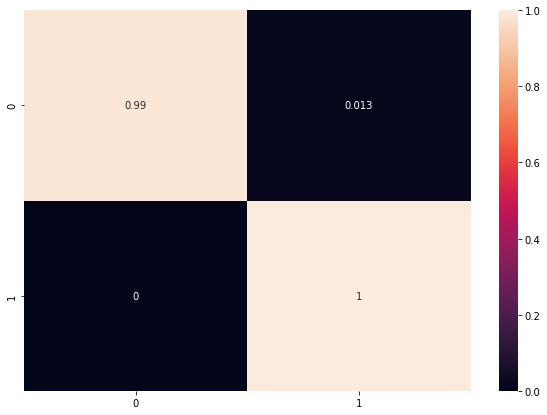

In [18]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

Linear SVM InceptionV3 Adam
Acuracy 0.930947979931344
P,R,F1: (0.9134679020516214, 0.9484729064039409, 0.9254722052688445, None)
CPU times: user 7min 12s, sys: 706 ms, total: 7min 13s
Wall time: 7min 13s


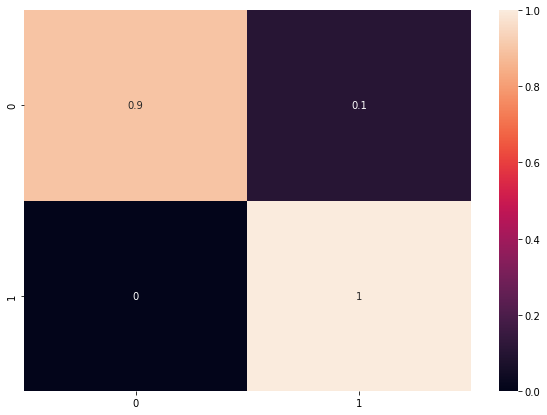

In [19]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

Linear SVM InceptionV3 Adagrad
Acuracy 0.9881172432004225
P,R,F1: (0.9835697650927973, 0.9897226916918698, 0.9865519580211812, None)
CPU times: user 32.9 s, sys: 645 ms, total: 33.6 s
Wall time: 33.4 s


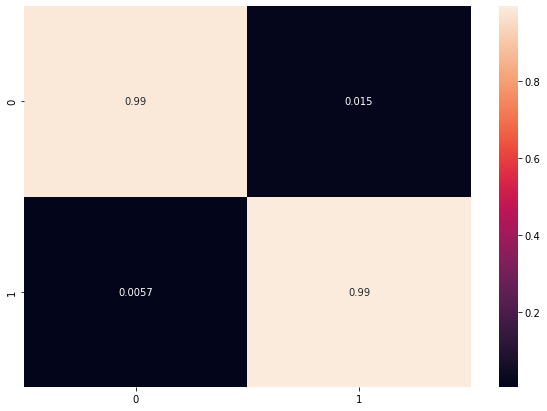

In [20]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> RBF SVM Test </h1>

RBF SVM VGG16 Adam
Acuracy 0.9280433060470029
P,R,F1: (0.9295210347687357, 0.9064058645303017, 0.9165483898260454, None)
CPU times: user 1min 50s, sys: 440 ms, total: 1min 50s
Wall time: 1min 50s


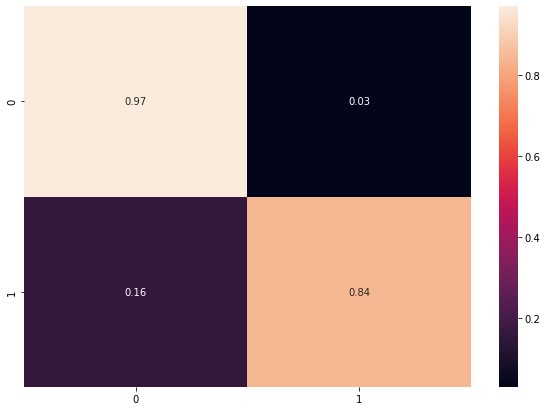

In [21]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('VGG16','Adam', X_train, y_train, X_test, y_test)

RBF SVM VGG16 RMSprop
Acuracy 0.9607869025613942
P,R,F1: (0.955949167791273, 0.9544967973295775, 0.9552175454177068, None)
CPU times: user 1min 29s, sys: 486 ms, total: 1min 29s
Wall time: 1min 29s


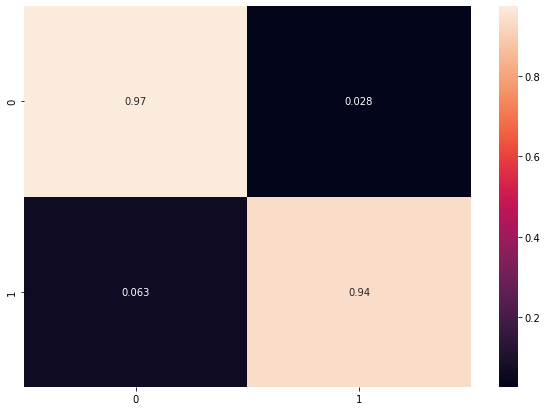

In [22]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

RBF SVM InceptionV3 Adam
Acuracy 0.9030895167678902
P,R,F1: (0.8836346066795535, 0.9089826070205883, 0.8935807922621419, None)
CPU times: user 2min 24s, sys: 482 ms, total: 2min 24s
Wall time: 2min 24s


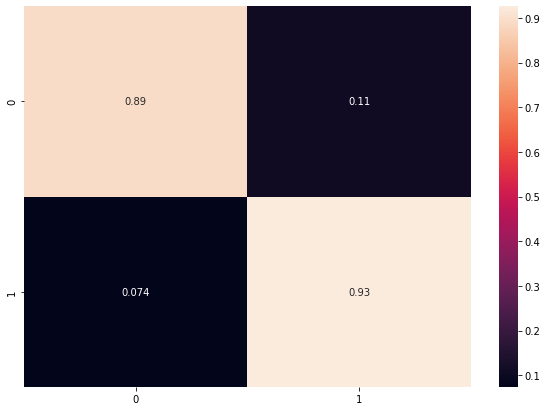

In [23]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

RBF SVM InceptionV3 Adagrad
Acuracy 0.9932664378135727
P,R,F1: (0.9899566758566365, 0.9949862367282737, 0.9924078782007257, None)
CPU times: user 47.6 s, sys: 483 ms, total: 48.1 s
Wall time: 47.8 s


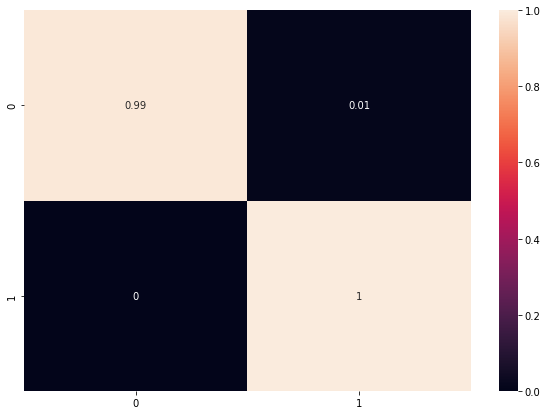

In [24]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Sigmoid SVM Test </h1>

Sigmoid SVM VGG16 Adam
Acuracy 0.48547663057829415
P,R,F1: (0.41778138938605097, 0.4164044657351432, 0.4170445954630058, None)
CPU times: user 2min 30s, sys: 450 ms, total: 2min 31s
Wall time: 2min 31s


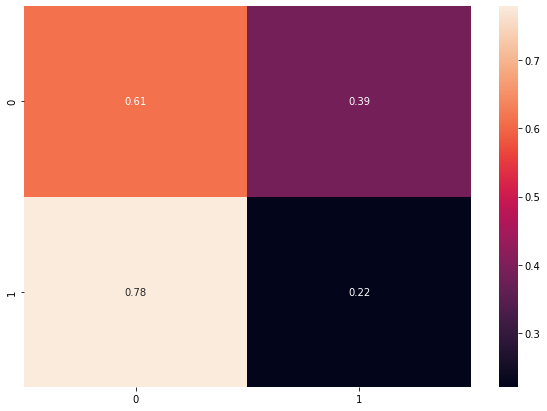

In [25]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('VGG16','Adam', X_train, y_train, X_test, y_test)

Sigmoid SVM VGG16 RMSprop
Acuracy 0.5555848956958014
P,R,F1: (0.49919090982109665, 0.499198950836326, 0.49917043377897474, None)
CPU times: user 2min 47s, sys: 477 ms, total: 2min 47s
Wall time: 2min 47s


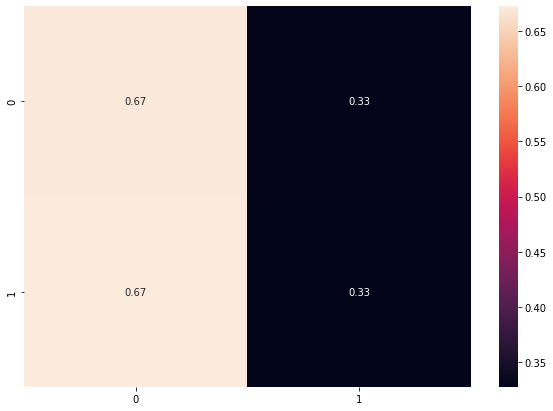

In [26]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

Sigmoid SVM InceptionV3 Adam
Acuracy 0.6660945339318722
P,R,F1: (0.6189478733675327, 0.6157191403843629, 0.6171122695347564, None)
CPU times: user 1min 54s, sys: 470 ms, total: 1min 55s
Wall time: 1min 55s


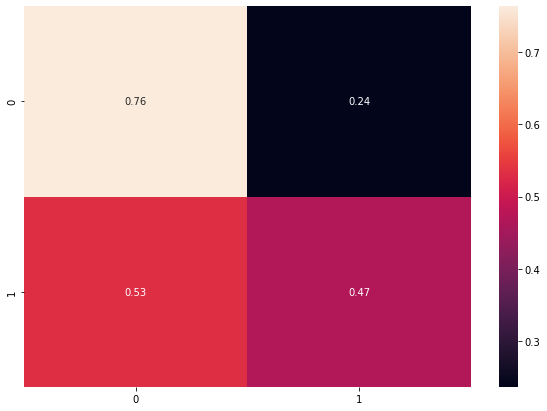

In [27]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

Sigmoid SVM InceptionV3 Adagrad
Acuracy 0.918537100607341
P,R,F1: (0.9067027666488687, 0.9107587487544653, 0.9086745049941515, None)
CPU times: user 52.4 s, sys: 446 ms, total: 52.9 s
Wall time: 52.6 s


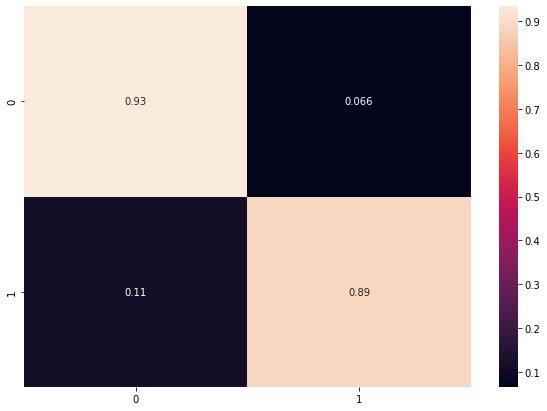

In [28]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Poly SVM Test </h1>

POLY SVM VGG16 Adam
Acuracy 0.861499867969369
P,R,F1: (0.904218662344948, 0.7939539613716988, 0.8225348963565506, None)
CPU times: user 1min 54s, sys: 472 ms, total: 1min 54s
Wall time: 1min 54s


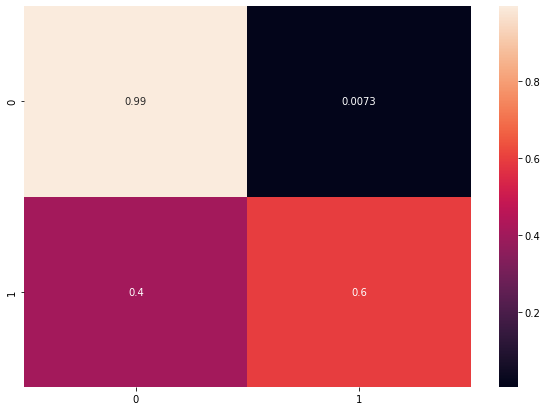

In [29]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('VGG16','Adam', X_train, y_train, X_test, y_test)

POLY SVM VGG16 RMSprop
Acuracy 0.8683654607869026
P,R,F1: (0.900108423271512, 0.8090590328658154, 0.8352668316206492, None)
CPU times: user 1min 44s, sys: 468 ms, total: 1min 44s
Wall time: 1min 44s


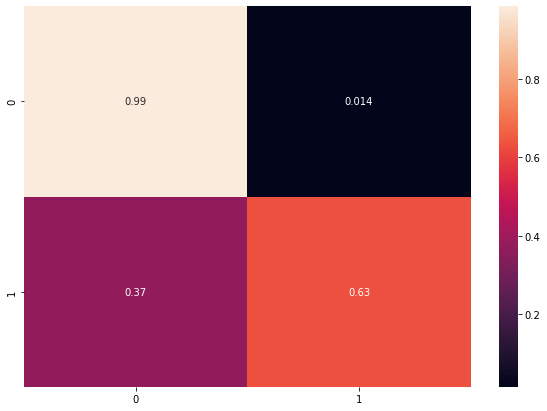

In [30]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

POLY SVM InceptionV3 Adam
Acuracy 0.9021653023501452
P,R,F1: (0.8861370970124286, 0.8976577018498778, 0.8913763678345548, None)
CPU times: user 2min 13s, sys: 445 ms, total: 2min 14s
Wall time: 2min 14s


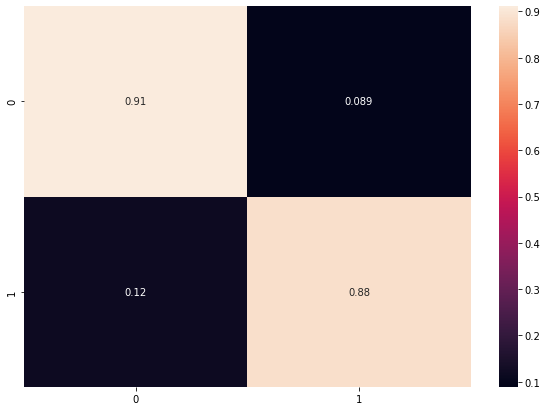

In [31]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

POLY SVM InceptionV3 Adagrad
Acuracy 0.9924742540269342
P,R,F1: (0.9891302465126349, 0.9942358290481026, 0.9916114961429938, None)
CPU times: user 34.1 s, sys: 428 ms, total: 34.5 s
Wall time: 34.3 s


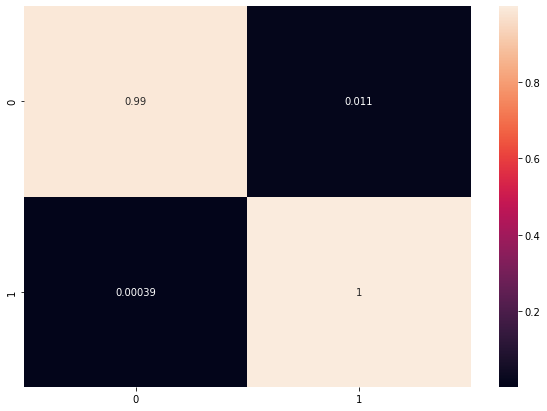

In [32]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Classification Best Performing Models </h1>
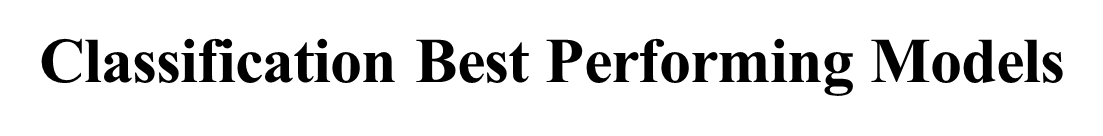
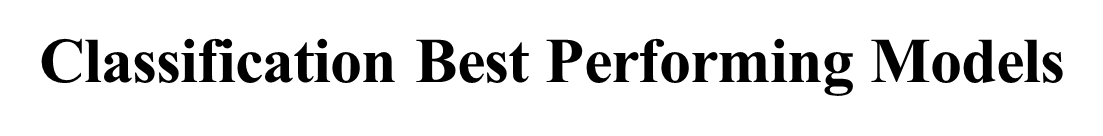
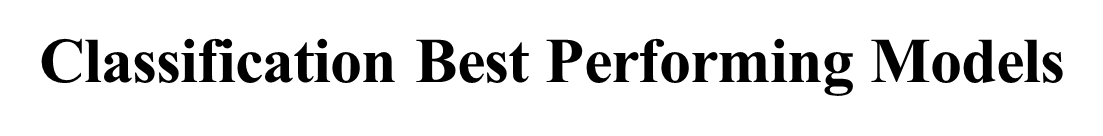
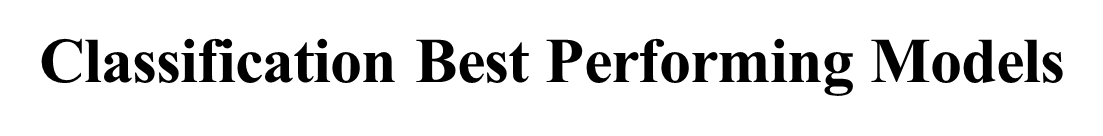

1. Average training time for Inception-v3-Adagrad architecture is significantly lower than other architectures.
2. Best performing model is Poly SVM with the accuracy of 99.28 %.
3. We have classified the fraud signature with accuracy of 99.999 %.
4. We have classified the genuine with accuracy of 99.00 %.
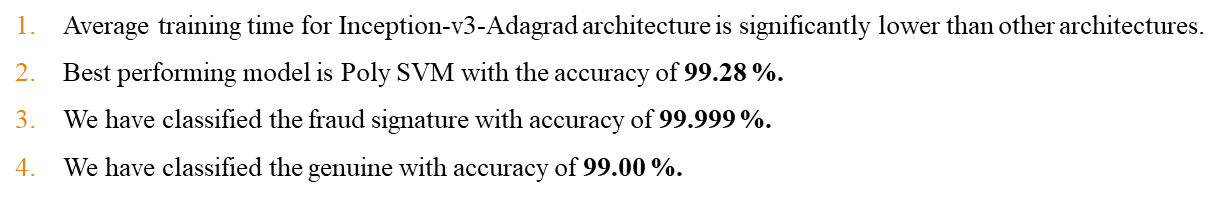
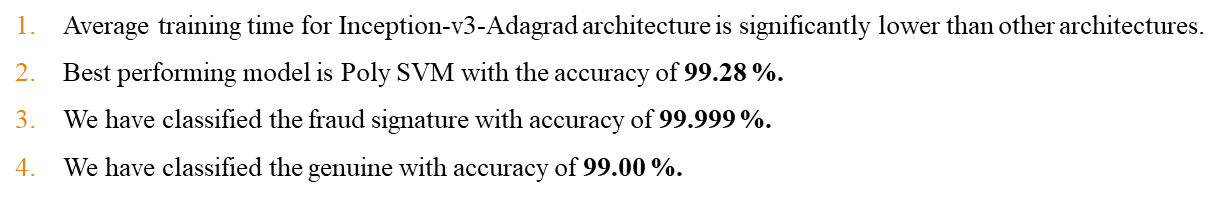
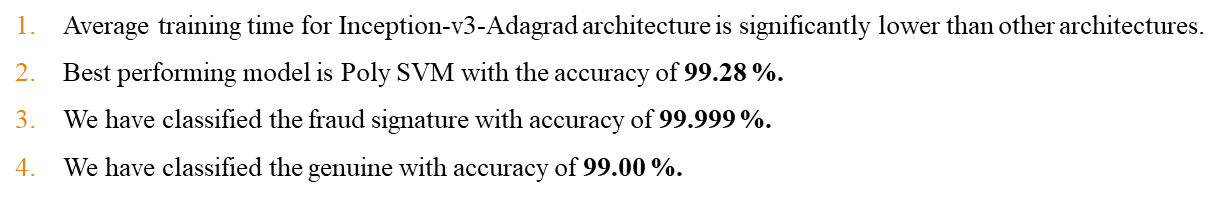
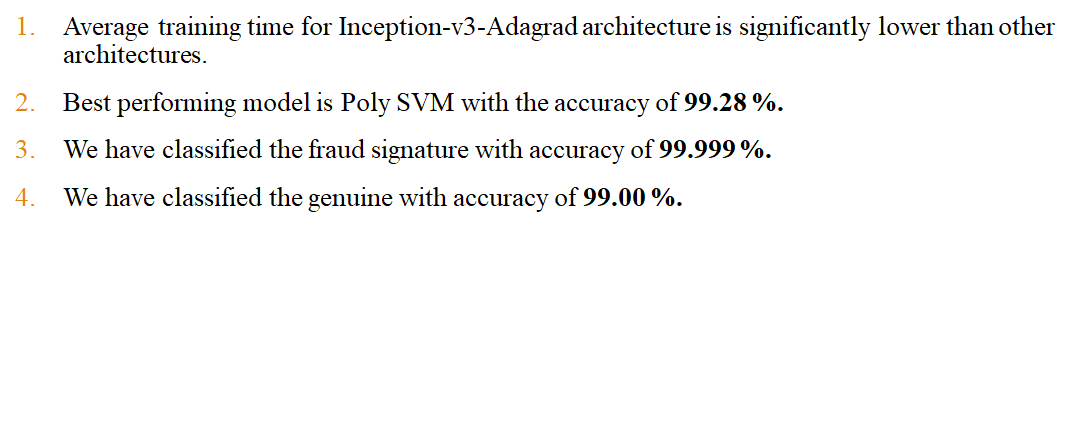
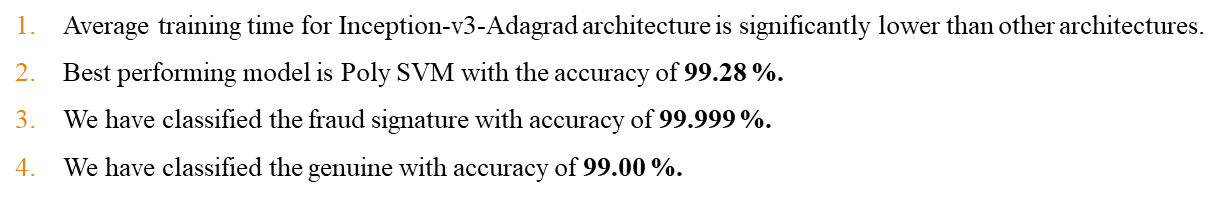